### Weight initialization technique:
1. Xavier/Glorot

2. He Initialization





### He  Initialization
-> used relu activation function in hidden layers

-> for relu activation function we get a better performance

-> Has two formula
1. Normal
2. Uniform

Today's tutorial we apply 'he normal' technique

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


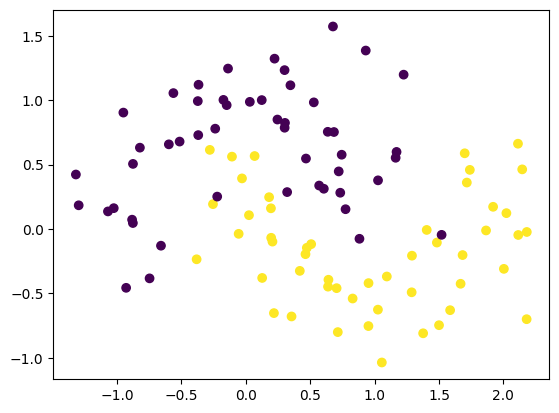

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

used 'he_normal' for weights initialization

In [7]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.get_weights()

[array([[ 1.046547  ,  0.44775176, -0.12391786, -1.1024839 ,  1.7119534 ,
          0.9051063 , -1.4114592 , -1.0068284 ,  1.6201727 ,  0.47778752],
        [ 0.819611  ,  0.6029328 ,  1.0922967 , -0.85624903,  1.04409   ,
         -1.8608228 ,  0.6422897 , -1.0751485 ,  1.4999996 ,  0.83623874]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.4217262 , -0.51274765,  0.10220297,  0.06539992,  0.7146498 ,
         -0.08103368,  0.05646159,  0.7197601 , -0.0789901 , -0.6029649 ],
        [ 0.33860496, -0.44890127, -0.39173362,  0.344441  ,  0.22094068,
          0.24375835, -0.18207711,  0.7149678 , -0.26468408, -0.98419976],
        [-0.62017834,  0.465765  , -0.0127588 , -0.10660562,  0.05563292,
          0.71964175, -0.02498426, -0.6630822 ,  0.12642321,  0.42838603],
        [-0.41337493,  0.29583845,  0.05958275,  0.10682061,  0.5559784 ,
          0.49176264,  0.04544761,  0.02354293,  0.40104553,  0.9416038 ],
        [-0.66608

In [9]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.5195 - loss: 0.7329 - val_accuracy: 0.5000 - val_loss: 0.7274
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4766 - loss: 0.7327 - val_accuracy: 0.5000 - val_loss: 0.7134
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5312 - loss: 0.7002 - val_accuracy: 0.5000 - val_loss: 0.7007
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4805 - loss: 0.7373 - val_accuracy: 0.5000 - val_loss: 0.6891
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.6889 - val_accuracy: 0.5000 - val_loss: 0.6784
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4844 - loss: 0.7075 - val_accuracy: 0.5000 - val_loss: 0.6681
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4961 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.6582
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5078 - loss: 0.6764 - val_accuracy: 0.5000 - val_loss

In [11]:
model.get_weights()

[array([[ 1.0570465 ,  0.5344136 , -0.24484253, -1.2642883 ,  1.7456824 ,
          1.0466888 , -1.453116  , -0.948895  ,  1.5761437 ,  0.6364734 ],
        [ 0.7251792 ,  0.5088887 ,  1.266576  , -0.66168684,  0.932776  ,
         -1.8305752 ,  0.66502976, -1.1136671 ,  1.6219487 ,  0.92665833]],
       dtype=float32),
 array([-0.11412548, -0.0668754 ,  0.12727295,  0.01351519,  0.17841141,
         0.03975808, -0.12528363, -0.08735406,  0.02149281,  0.0111847 ],
       dtype=float32),
 array([[ 0.5077825 , -0.5432315 ,  0.08769183,  0.04549629,  0.60700715,
         -0.02669167,  0.15397173,  0.6849796 , -0.11164235, -0.72208476],
        [ 0.40299731, -0.49464467, -0.40621704,  0.344441  ,  0.11600539,
          0.32349288, -0.11899806,  0.6811217 , -0.26611134, -1.028247  ],
        [-0.82085043,  0.26138675, -0.02697349, -0.10660562,  0.12152635,
          0.8852433 , -0.2628104 , -0.5583441 ,  0.30119628,  0.5208812 ],
        [-0.48542538,  0.26457694,  0.05958275,  0.0894102 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

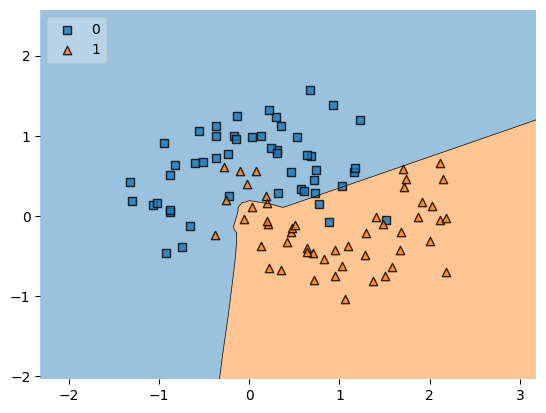

In [12]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype(int),clf=model,legend=2)